In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from specutils import Spectrum1D
from specutils.io import read_fits
from specutils.wcs import specwcs
import pysynphot as Snp

%matplotlib notebook

In [2]:
# Loading data:

## June datasets:

filename = './obj_148-159_142-143.fits'
extension = 1
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', 
                                           c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
IGRJ17407_June_D1 = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

filename = './obj_165-172_142-143.fits'
extension = 1
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', 
                                           c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
IGRJ17407_June_D2 = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

filename = './obj_177-184_142-143.fits'
extension = 1
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', 
                                           c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
IGRJ17407_June_D3 = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

## Aug datasets:

filename = './xtfobj_N20150802S_88-95_HIP79881.fits'
extension = 1
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', 
                                           c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
IGRJ17407_Aug_D1 = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

filename = './xtfobj_N20150802S_102-109_HIP79881.fits'
extension = 1
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', 
                                           c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
IGRJ17407_Aug_D2 = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

## Combined spectra:
IGRJ17407_June_avg = read_fits.read_fits_spectrum1d('./N20150603S_obj_all.fits',dispersion_unit='angstrom')
IGRJ17407_June_avgscl = read_fits.read_fits_spectrum1d('./sci_june_scaled.fits',dispersion_unit='angstrom')
IGRJ17407_Aug_avg = read_fits.read_fits_spectrum1d('./N20150802S_obj_all.fits',dispersion_unit='angstrom')
IGRJ17407_all_avg = read_fits.read_fits_spectrum1d('./sci_all_combined.fits',dispersion_unit='angstrom')

## Standard stars:
HIP79881 = read_fits.read_fits_spectrum1d('HIP79881_noscale.fits',dispersion_unit='angstrom')
HIP93691 = read_fits.read_fits_spectrum1d('HIP93691_noscale.fits',dispersion_unit='angstrom')

## Example of telluric features:
atmos = read_fits.read_fits_spectrum1d('../resources/atmos_S_K_smoothed.fits',dispersion_unit='angstrom')

## June data

<IPython.core.display.Javascript object>


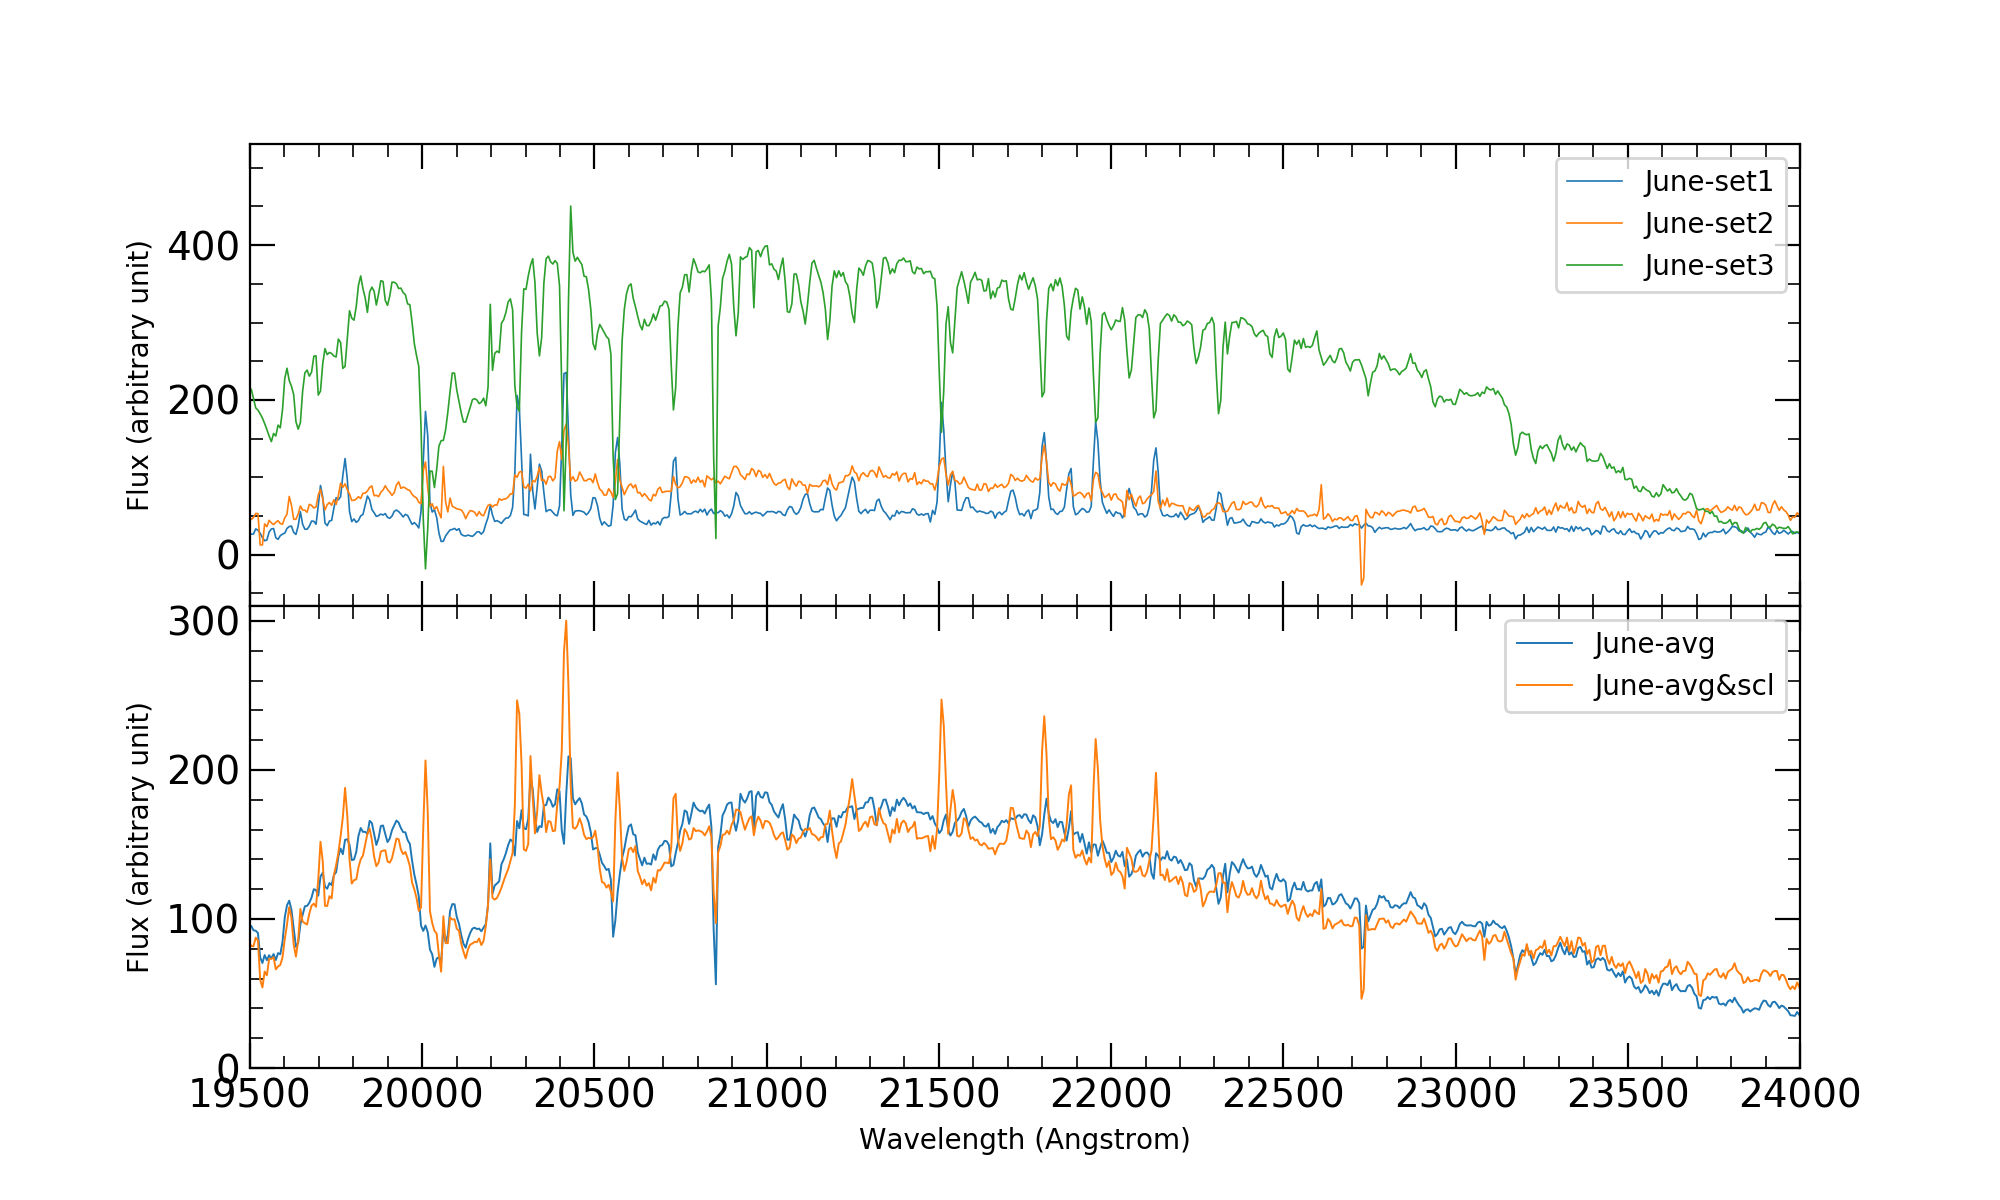

In [5]:
plt.figure(figsize=(10,6))
plt.subplot2grid((2,1),(0,0))
plt.plot(IGRJ17407_June_D1.dispersion,IGRJ17407_June_D1.flux,lw=0.6, label='June-set1')
plt.plot(IGRJ17407_June_D2.dispersion,IGRJ17407_June_D2.flux,lw=0.6, label='June-set2')
plt.plot(IGRJ17407_June_D3.dispersion,IGRJ17407_June_D3.flux,lw=0.6, label='June-set3')
plt.legend()
plt.xlim(19500,24000)
plt.ylabel('Flux (arbitrary unit)')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
plt.gca().axes.set_xticklabels([])
plt.subplot2grid((2,1),(1,0))
plt.plot(IGRJ17407_June_avg.dispersion,IGRJ17407_June_avg.flux,lw=0.7, label='June-avg')
plt.plot(IGRJ17407_June_avgscl.dispersion,IGRJ17407_June_avgscl.flux,lw=0.7, label='June-avg&scl')
plt.legend()
plt.xlim(19500,24000)
plt.ylim(0,310)
plt.ylabel('Flux (arbitrary unit)')
plt.xlabel('Wavelength (Angstrom)')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)

## August data

<IPython.core.display.Javascript object>


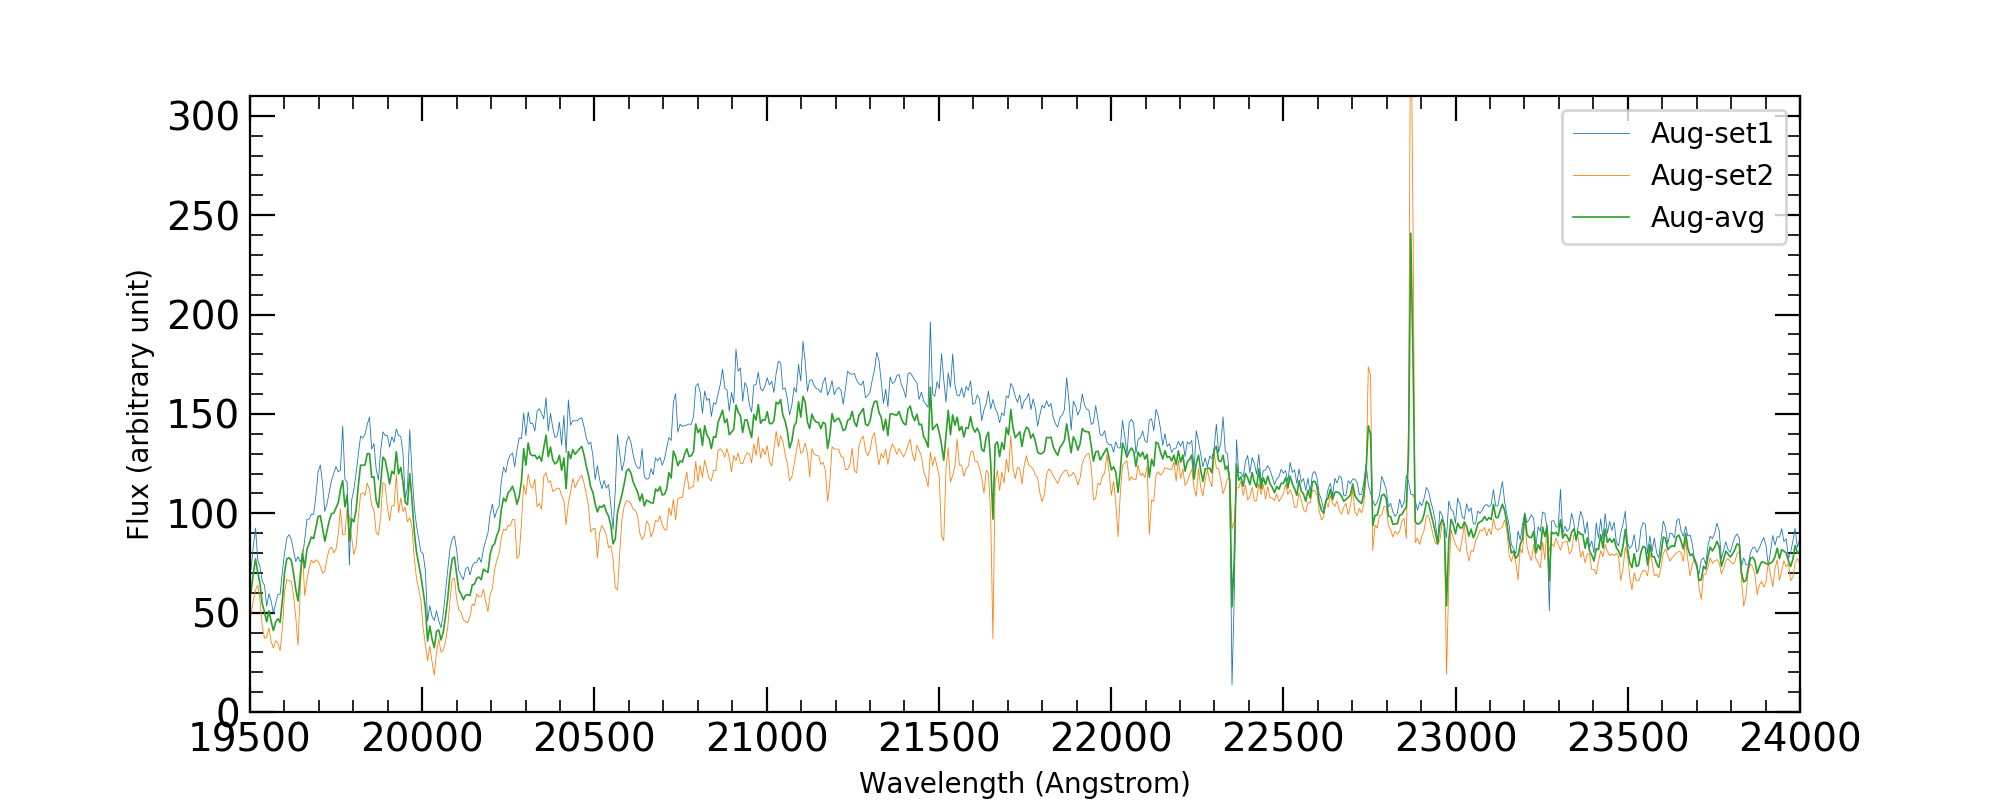

In [4]:
plt.figure(figsize=(10,4))
plt.plot(IGRJ17407_Aug_D1.dispersion,IGRJ17407_Aug_D1.flux,lw=0.3, label='Aug-set1')
plt.plot(IGRJ17407_Aug_D2.dispersion,IGRJ17407_Aug_D2.flux,lw=0.3, label='Aug-set2')
plt.plot(IGRJ17407_Aug_avg.dispersion,IGRJ17407_Aug_avg.flux,lw=0.6, label='Aug-avg')
plt.legend()
plt.xlim(19500,24000)
plt.ylim(0,310)
plt.ylabel('Flux (arbitrary unit)')
plt.xlabel('Wavelength (Angstrom)')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')

<IPython.core.display.Javascript object>


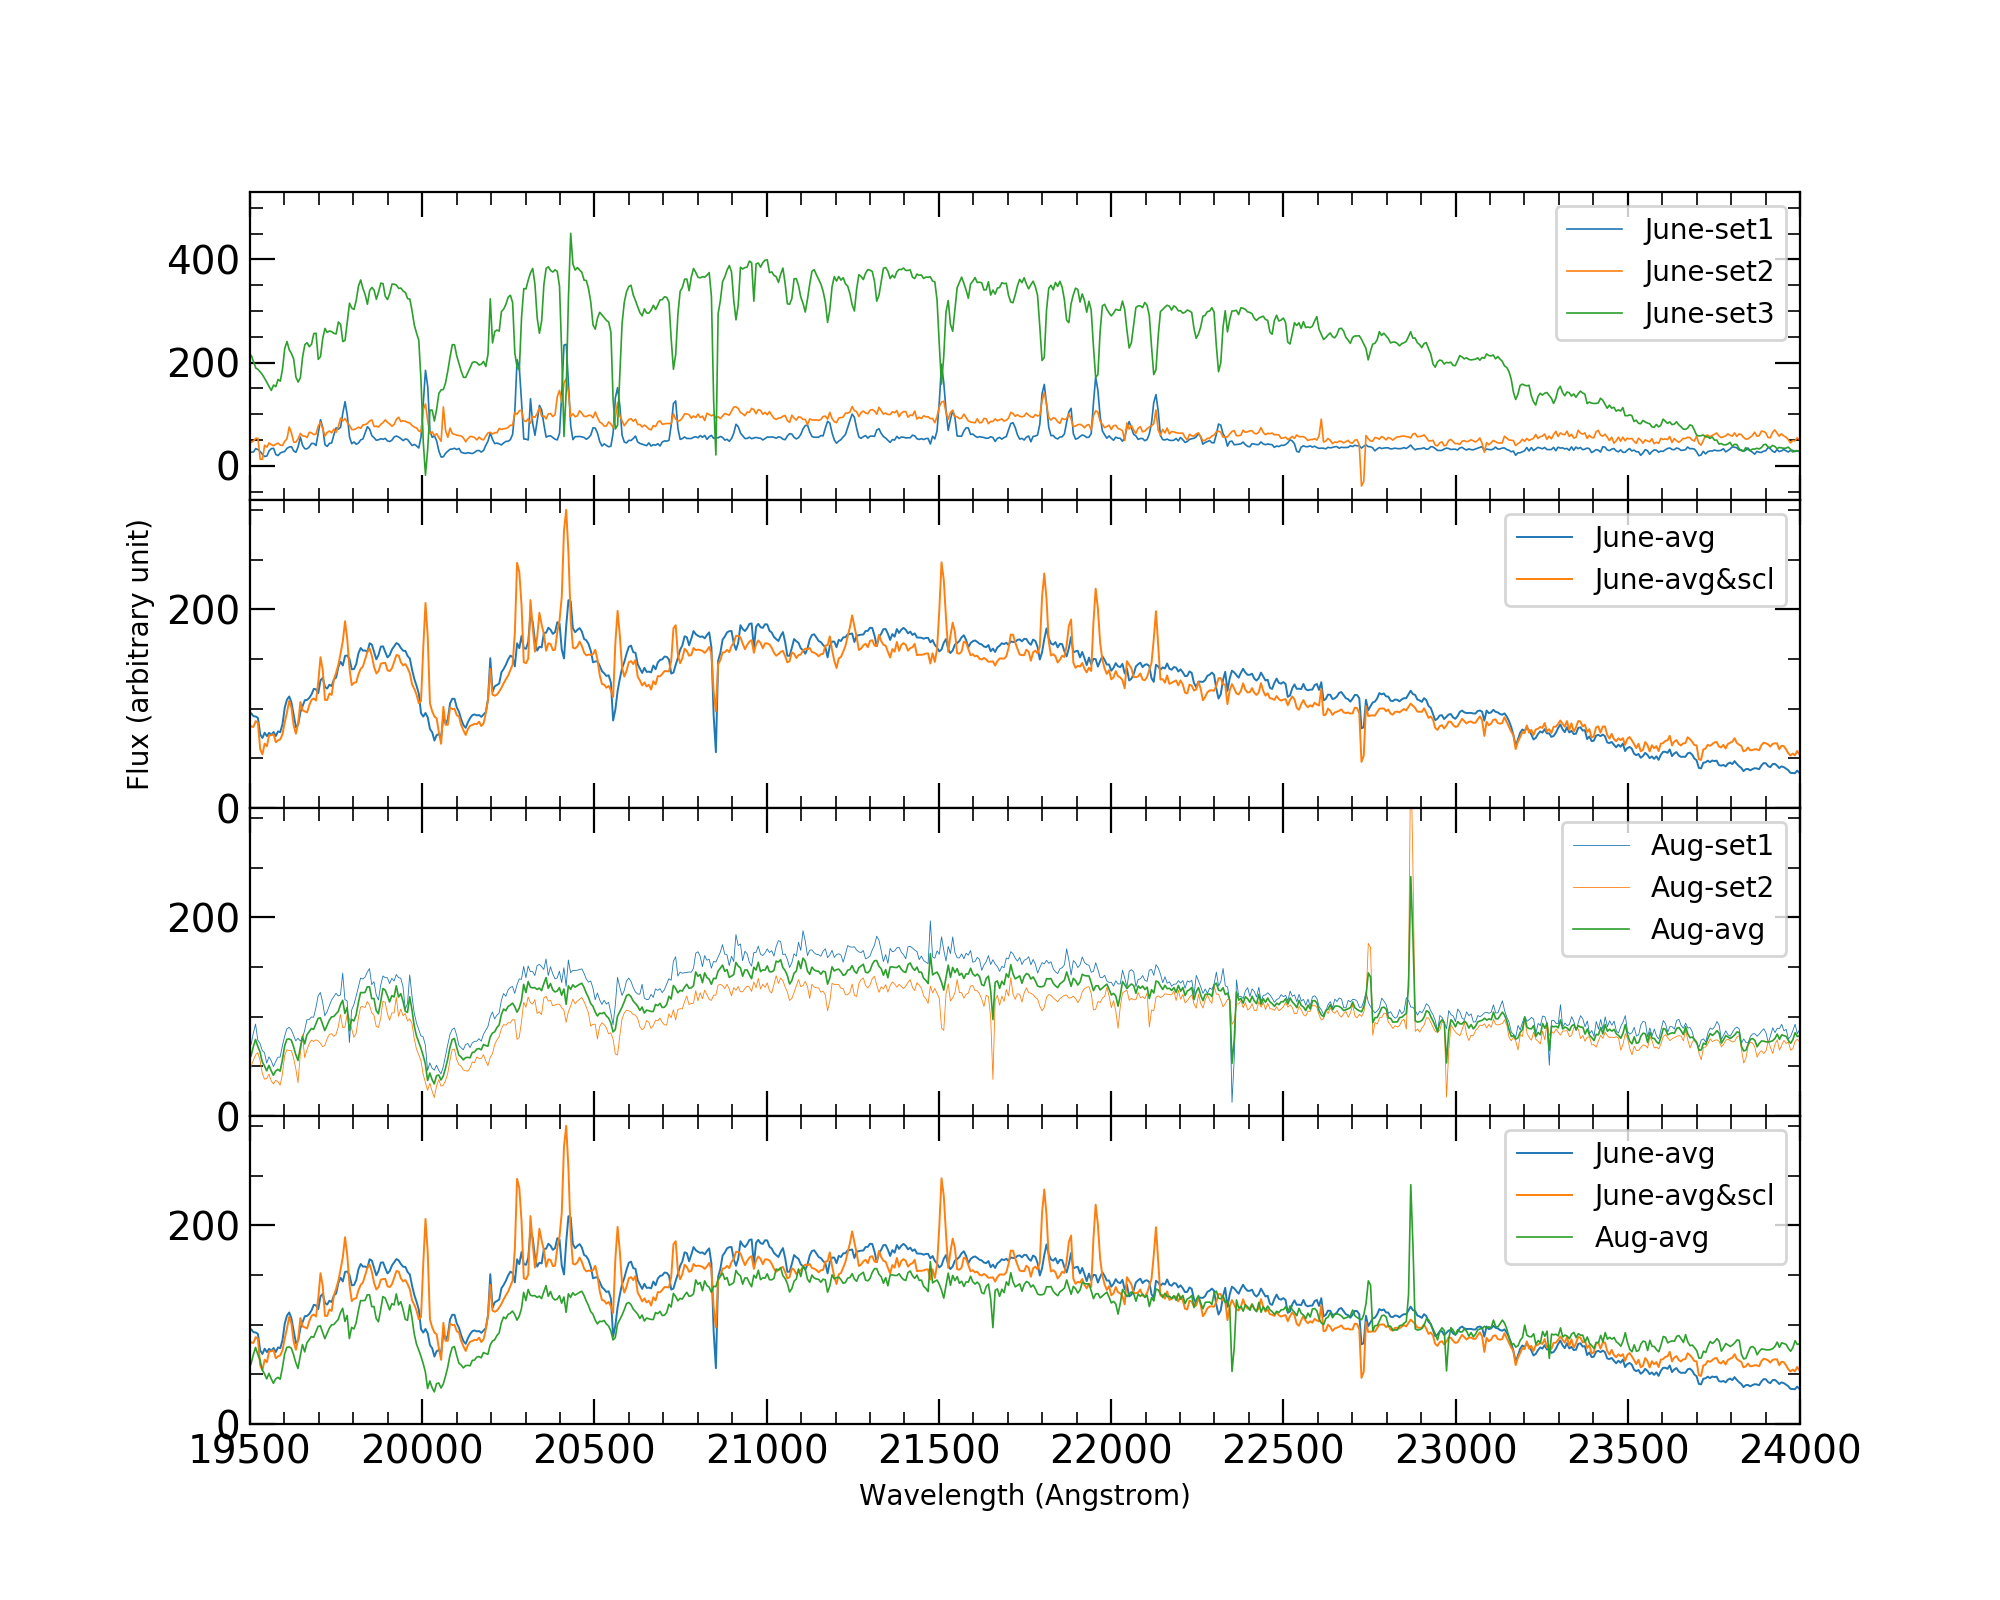

In [5]:
plt.figure(figsize=(10,8))
plt.subplot2grid((4,1),(0,0))
plt.plot(IGRJ17407_June_D1.dispersion,IGRJ17407_June_D1.flux,lw=0.6, label='June-set1')
plt.plot(IGRJ17407_June_D2.dispersion,IGRJ17407_June_D2.flux,lw=0.6, label='June-set2')
plt.plot(IGRJ17407_June_D3.dispersion,IGRJ17407_June_D3.flux,lw=0.6, label='June-set3')
plt.legend()
plt.xlim(19500,24000)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
plt.gca().axes.set_xticklabels([])

plt.subplot2grid((4,1),(1,0))
plt.plot(IGRJ17407_June_avg.dispersion,IGRJ17407_June_avg.flux,lw=0.7, label='June-avg')
plt.plot(IGRJ17407_June_avgscl.dispersion,IGRJ17407_June_avgscl.flux,lw=0.7, label='June-avg&scl')
plt.legend()
plt.xlim(19500,24000)
plt.ylim(0,310)
plt.ylabel('Flux (arbitrary unit)')
plt.xlabel('Wavelength (Angstrom)')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
plt.gca().axes.set_xticklabels([])

plt.subplot2grid((4,1),(2,0))
plt.plot(IGRJ17407_Aug_D1.dispersion,IGRJ17407_Aug_D1.flux,lw=0.3, label='Aug-set1')
plt.plot(IGRJ17407_Aug_D2.dispersion,IGRJ17407_Aug_D2.flux,lw=0.3, label='Aug-set2')
plt.plot(IGRJ17407_Aug_avg.dispersion,IGRJ17407_Aug_avg.flux,lw=0.6, label='Aug-avg')
plt.legend()
plt.xlim(19500,24000)
plt.ylim(0,310)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
plt.gca().axes.set_xticklabels([])

plt.subplot2grid((4,1),(3,0))
plt.plot(IGRJ17407_June_avg.dispersion,IGRJ17407_June_avg.flux,lw=0.7, label='June-avg')
plt.plot(IGRJ17407_June_avgscl.dispersion,IGRJ17407_June_avgscl.flux,lw=0.7, label='June-avg&scl')
plt.plot(IGRJ17407_Aug_avg.dispersion,IGRJ17407_Aug_avg.flux,lw=0.6, label='Aug-avg')
plt.legend()
plt.xlabel('Wavelength (Angstrom)')
plt.xlim(19500,24000)
plt.ylim(0,310)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)

<IPython.core.display.Javascript object>


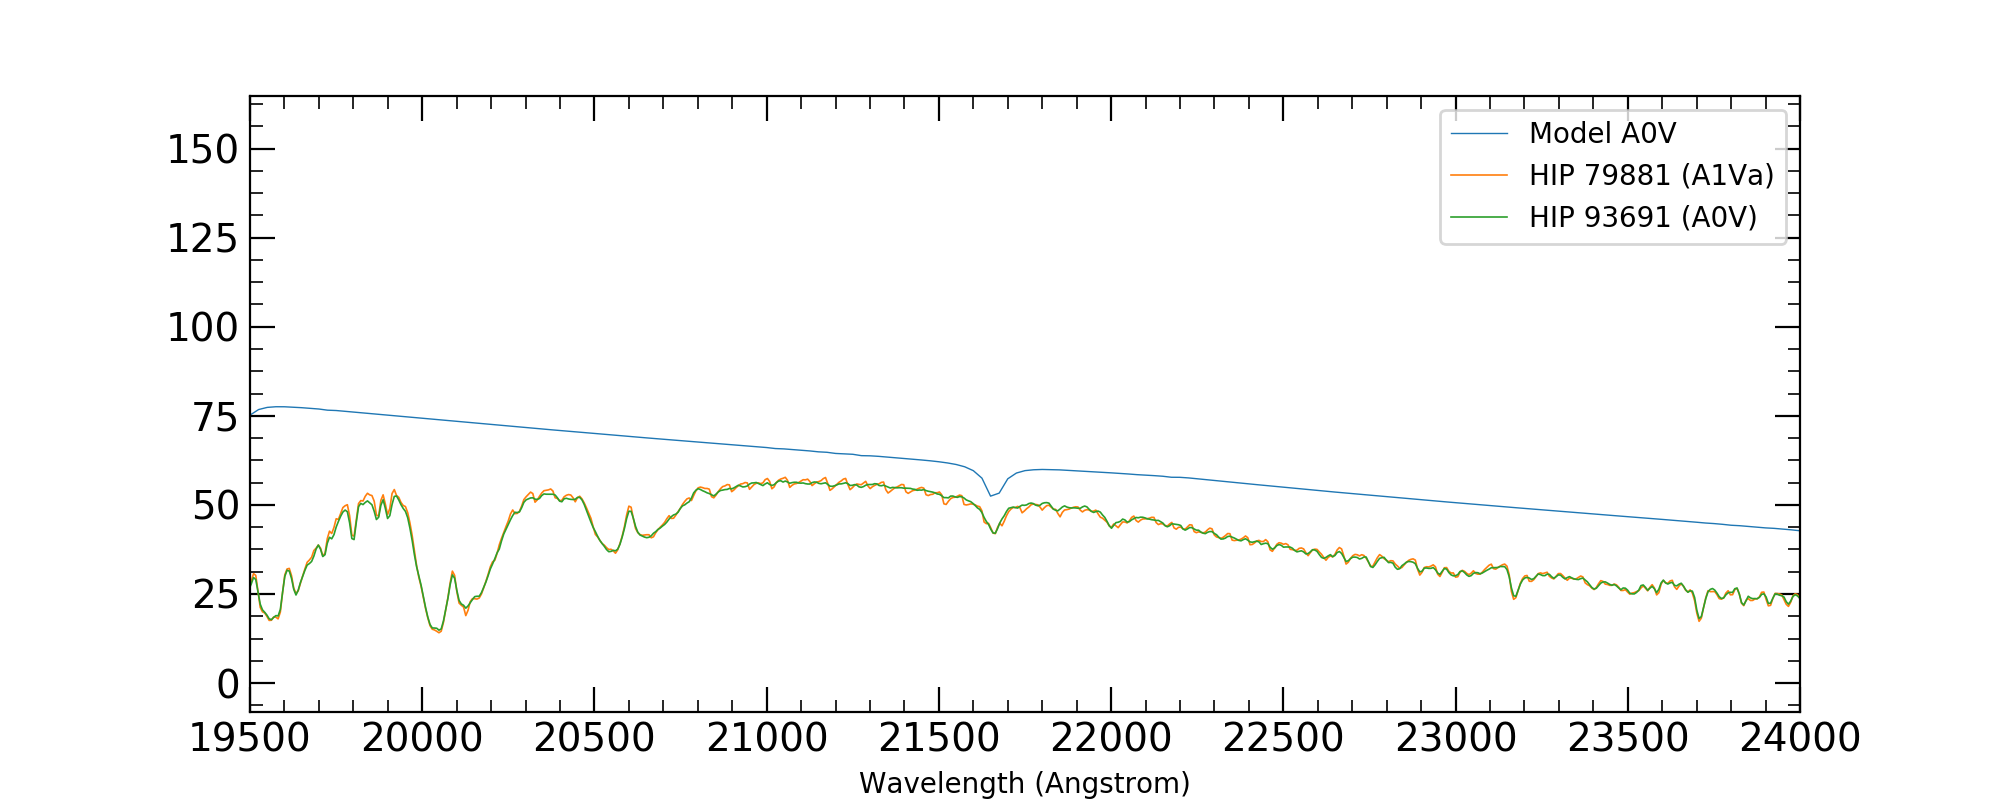

In [124]:
def spec_mo(d,r,ext,specfile,specg=None):
    """
    Function to create a stellar spectrum object based on Synphot atlas:
    
    d: Dinstance in kpc
    
    r: Radius of the star in R_solar
    
    ext: E(B-V), Extinction towards the star
    
    specfile: complete path to the spectral file in synphot database
    see: http://pysynphot.readthedocs.io/en/latest/appendixa.html
    
    specg: Column name containing flux data. This is only used if the given
    file is in FITS format. Refer to each atlas' instructions for this parameter.
    
    """
    dist = d*3.08e19
    rad = r*6.96e8
    src = Snp.FileSpectrum(specfile,fluxname=specg)*(rad/dist)**2
    redden = Snp.Extinction(ext,name='gal3')
    fullspec = redden*src
    fullspec.convert('flam')
    return fullspec


star1 = spec_mo(1,2.5,2.27,'/astro_sw/synphot_db/grp/hst/cdbs/calspec/alpha_lyr_005.fits')

plt.figure(figsize=(10,4))
plt.plot(star1.wave,star1.flux*1e33,lw=0.5,alpha=1.0, label='Model A0V')

#norm_s2 = np.average(star1.flux*1e33)/np.average(star2.flux)
#plt.plot(star2.wave,star2.flux*norm_s2,lw=0.7,alpha=1.0, label='SNP BPGS A1V')

#plt.plot(IGRJ17407_Aug_avg.dispersion,IGRJ17407_Aug_avg.flux,lw=0.6, label='Aug-avg')

norm79 = np.average(star1.flux*1e33)/np.average(HIP79881.flux)
norm93 = np.average(star1.flux*1e33)/np.average(HIP93691.flux)

plt.plot(HIP79881.dispersion,HIP79881.flux*norm79,lw=0.6, label='HIP 79881 (A1Va)')
plt.plot(HIP93691.dispersion,HIP93691.flux*norm93,lw=0.6, label='HIP 93691 (A0V)')

plt.legend()
plt.xlim(19500,24000)
#plt.ylim(0,310)
plt.xlabel('Wavelength (Angstrom)')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')

<IPython.core.display.Javascript object>


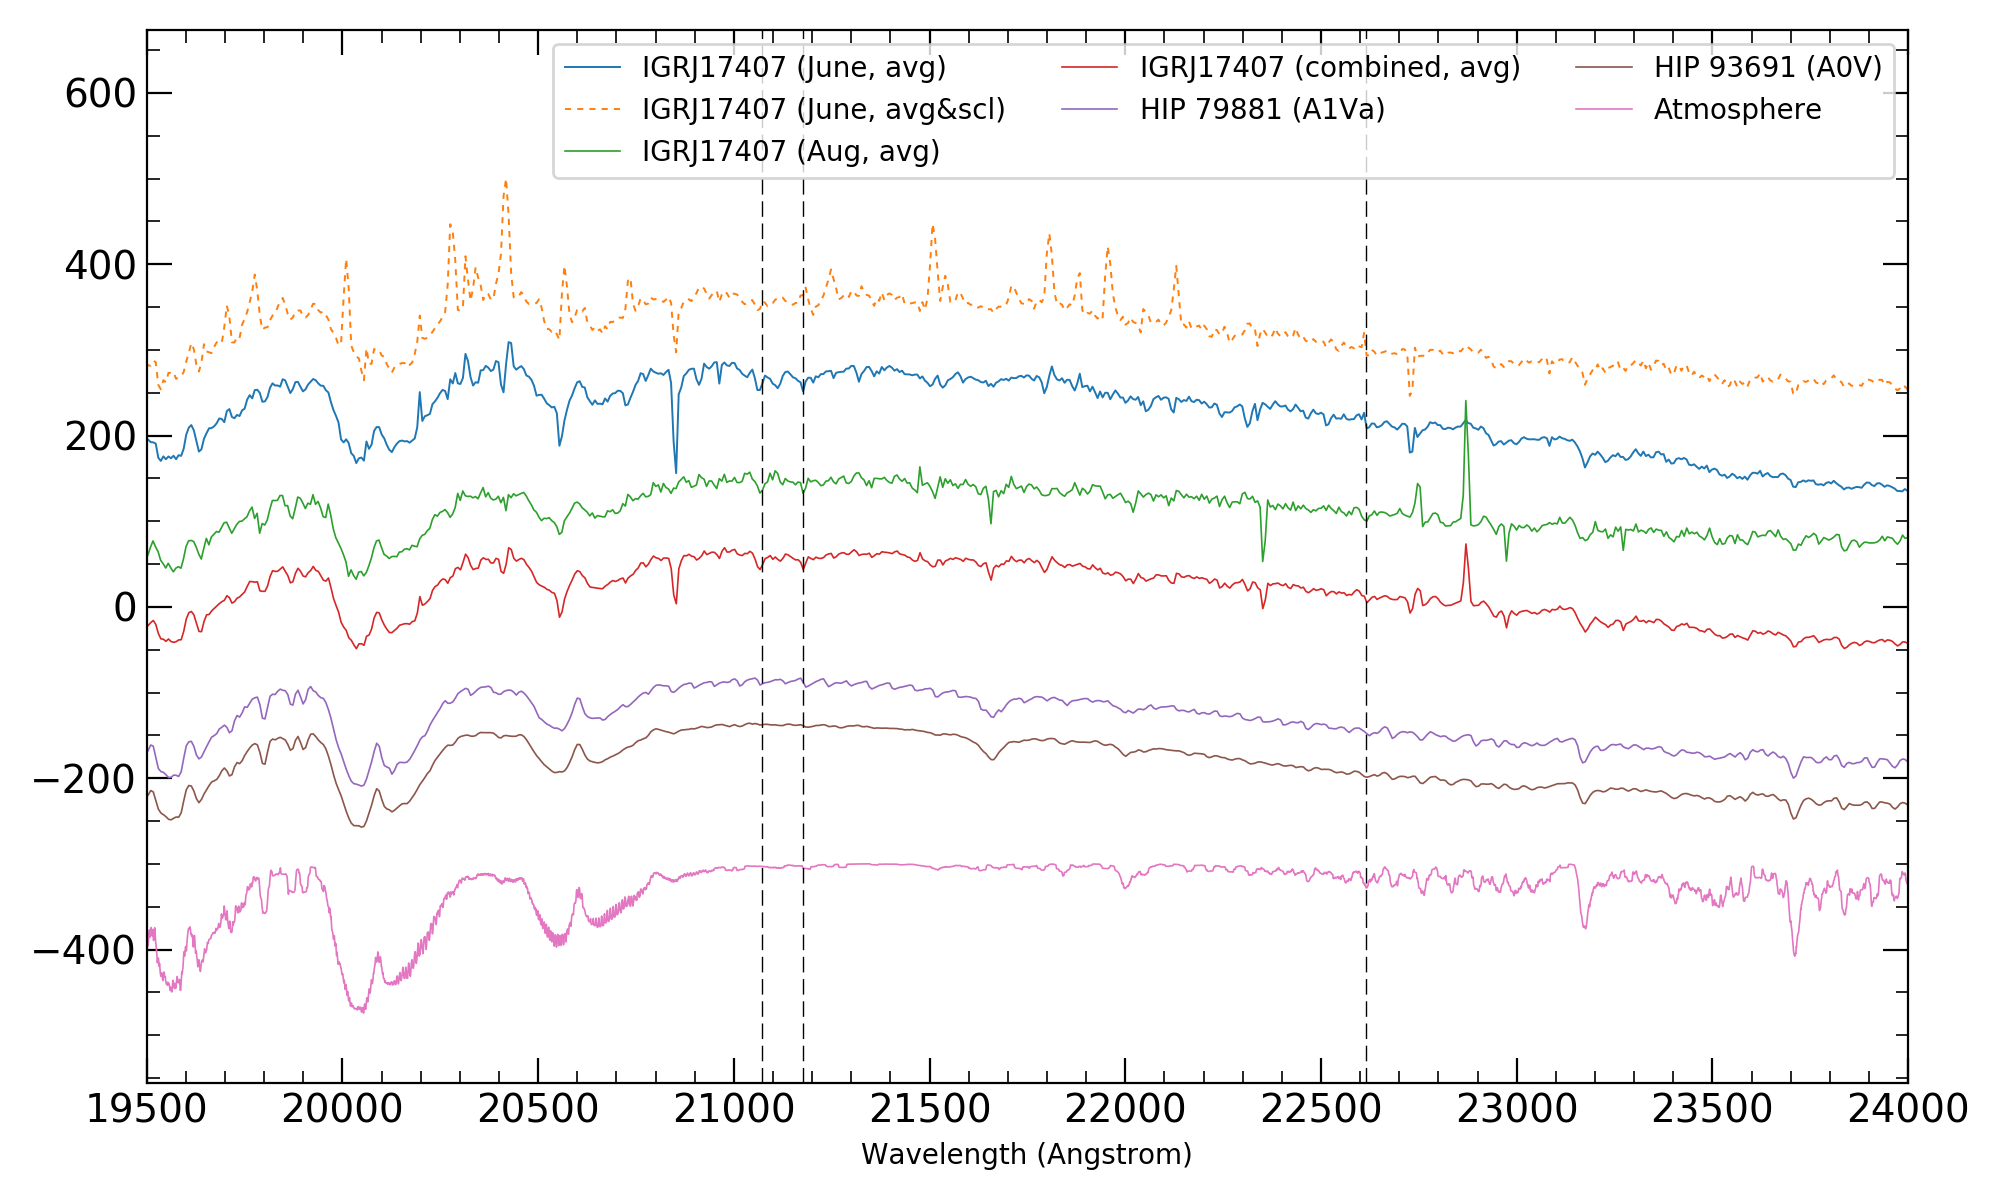

In [3]:
plt.figure(figsize=(10,6))
plt.plot(IGRJ17407_June_avg.dispersion,IGRJ17407_June_avg.flux+100,lw=0.7, label='IGRJ17407 (June, avg)')
plt.plot(IGRJ17407_June_avgscl.dispersion,IGRJ17407_June_avgscl.flux+200, ':', lw=0.7, label='IGRJ17407 (June, avg&scl)')
plt.plot(IGRJ17407_Aug_avg.dispersion,IGRJ17407_Aug_avg.flux,lw=0.6, label='IGRJ17407 (Aug, avg)')
plt.plot(IGRJ17407_all_avg.dispersion,IGRJ17407_all_avg.flux-100,lw=0.6, label='IGRJ17407 (combined, avg)')

norm79 = np.average(IGRJ17407_Aug_avg.flux)/np.average(HIP79881.flux)
plt.plot(HIP79881.dispersion,(HIP79881.flux*norm79)-250,lw=0.6, label='HIP 79881 (A1Va)')
norm93 = np.average(IGRJ17407_Aug_avg.flux)/np.average(HIP93691.flux)
plt.plot(HIP93691.dispersion,(HIP93691.flux*norm93)-300,lw=0.6, label='HIP 93691 (A0V)')
plt.plot(atmos.dispersion,(atmos.flux*200)-500,lw=0.6, label='Atmosphere')

plt.axvline(x=22614.7, c='k', ls='--', lw=0.5)     #Ca I 
plt.axvline(x=21175.7, c='k', ls='--', lw=0.5)     #Al I
plt.axvline(x=21070.8, c='k', ls='--', lw=0.5)     # He(?) or Mg I


plt.legend(ncol=3)
plt.xlabel('Wavelength (Angstrom)')
plt.xlim(19500,24000)
#plt.ylim(0,310)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')
plt.tight_layout()

https://www.gemini.edu/sciops/instruments/nearir-resources/spectral-templates/library-v20

http://irtfweb.ifa.hawaii.edu/~spex/IRTF_Spectral_Library/index_files/All.html

http://www.astronomerstelegram.org/?read=3695